# Visualizando taxas de fertilidade adolescente no Brasil e no Mundo

Vamos obter informações sobre como a taxa de fertilidade adolescente evoluiu nas últimas décadas e como ela varia entre diferentes grupos de países.

Os dados foram obtidos do site do Banco Mundial, na base de dados referentes a estudos (estatísticas) de gênero.
https://datacatalog.worldbank.org/dataset/gender-statistics (World Bank Gender Statistics Dataset).

Estamos interessados no indicador **SP.ADO.TFRT**, que é a taxa de fertilidade adolescente. Esta é definida pelo número de nascimentos por ano para 1000 mulheres com idade entre 15 e 19 anos (Adolescent fertility rate is the number of births per 1,000 women ages 15-19).

In [2]:
library(tidyverse)
library(gridExtra)

gender_data <- read_csv("Gender_StatsData.csv")

teen_fr <- filter(gender_data, `Indicator Code` == "SP.ADO.TFRT")
rm(gender_data)
head(teen_fr,3)

Warning message:
"Missing column names filled in: 'X63' [63]"Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character(),
  X63 = col_character()
)
See spec(...) for full column specifications.


Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,X63
Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,134.22361,134.83863,135.57090,135.4446,135.27490,134.9472,...,50.10461,49.90012,49.72376,49.53907,49.11124,48.64754,48.11455,47.44007,NA,NA
Caribbean small states,CSS,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,146.74378,146.90023,147.06916,145.6199,144.30854,143.0531,...,61.54816,60.28361,58.97198,57.57641,56.43608,55.25676,54.05761,52.80647,NA,NA
Central Europe and the Baltics,CEB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,46.09934,45.42201,44.70266,44.9639,45.19137,45.4119,...,21.61264,21.24941,20.94254,20.69047,20.38378,20.09069,19.78258,19.45588,NA,NA


## Sobre os dados

Fonte: https://datacatalog.worldbank.org/dataset/gender-statistics

Os dados referem-se ao período de 1960 a 2016. Uma análise mais detalhada demonstra que temos o indicador tanto para 194 países individualmente (de um total de 217), como para grupos de países, como "mundo árabe", "Europa Central e Balcãs".

**ATENÇÃO:** Através do arquivo auxiliar "Gender_StatsSeries-Time.csv", vemos que a série temporal para o indicador SP.ADO.TFRT é construída por meio de interpolações de dados agregados. Nos anos terminados em 2 e 7, são inseridos dados relativos a um período anterior de 5 anos. Por exemplo, em 1997, foram incluídos dados referentes ao período 1990-1995. Para os anos que não terminam em 2 ou 7, o índice é uma interpolação!

Os dados estão organizados com cada linha representando um país/região, com os anos organizados em colunas. Vamos alterar esta estrutura para facilitar a análise desejada.

## Visualizando dados em função do nível de renda dos países

Inicialmente, vamos observar a evolução temporal da fertilidade adolescente agrupada em função do nível de renda dos países.

Para tanto, usaremos `filter()` para extrair as linhas de interesse, e então `gather()` para criar uma coluna chave (key) para transpor anos em linhas. Os anos estão em formato *character (string)*, e para conveniência precisamos transformar em *numeric* (via `mutate()`).

Depois deste processamento, teremos observações agrupadas em *grupo-ano*. Uma maneira alternativa de organizar as observações (linhas) seria simplesmente por *ano*.

In [3]:
bygroupyear <- filter(teen_fr, `Country Code` %in% c("BRA","HIC","MIC","LIC")) %>%
            gather(key=Year, value=FertilityRate, `1960`:`2016`) %>%
            select(Year, `Country Name`, `Country Code`, FertilityRate) %>%
            mutate(Year = as.numeric(Year))

# Se ao invés de GRUPO-ANO, quiser organizar apenas por ANO:
byyear <- select(bygroupyear, Year, `Country Code`, FertilityRate) %>%
        spread(`Country Code`, FertilityRate)

In [4]:
# Opções de visualização gráfica
options(repr.plot.width=6, repr.plot.height=3.5)
tema <- theme(panel.background = element_rect(fill="grey96"), panel.border = element_rect(fill=NA, color="grey50"))

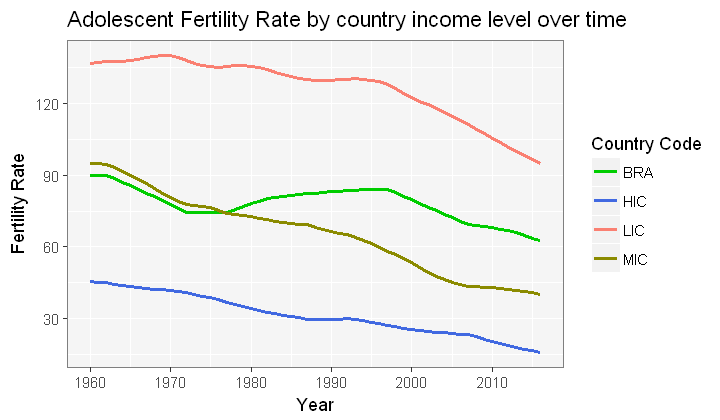

In [5]:
ggplot(bygroupyear, aes(x=Year, y=FertilityRate, group=`Country Code`, color=`Country Code`)) +
  geom_line(size=1) +
  scale_color_manual(values=c("green3","royalblue","salmon","yellow4")) +
  scale_x_continuous(breaks=seq(1950,2020,10)) +
  scale_y_continuous(name = "Fertility Rate", breaks=seq(0,150,30)) +
  labs(title='Adolescent Fertility Rate by country income level over time') +
  tema

Observamos que a taxa de fertilidade adolescente tem decrescido nas últimas décadas, para todos os níveis de renda dos países: alta, média e baixa (HIC, MIC e LIC, respectivamente). Entretanto, para países de renda baixa (LIC), a diminuição no indicador passou a ser significativa apenas a partir de 1997. Atualmente as disparidades continuam muito elevadas. A fertilidade adolescente em países de baixa renda hoje se aproxima da realidade observada na década de 1960 nos países de renda média.

Após 1997, queda contínua no índice de países de baixa renda. Ainda assim, longe do índice dos países de renda média. A diminuição do índice nos países de alta renda manteve um ritmo constante.

## Taxas de fertilidade adolescente no Brasil

O Brasil é classificado como um país de renda média (MIC, pelo arquivo auxiliar "Gender_StatsCountry.csv"). Até os anos 80, a taxa de fertilidade adolescente no Brasil acompanhava a média deste grupo de países. A partir dos anos 1980, houve um "descolamento", com o Brasil não acompanhando o decréscimo médio dos outros países. Uma tendência clara de redução deste indicador surge apenas a partir de 1997.

Para o seu nível de renda, o Brasil apresenta taxas bastante elevadas de gravidez na adolescência.

In [6]:
# Histogramas com países e posição do Brasil
bycountry <- slice(teen_fr,-(1:46))
histdata_twoyears <- select(bycountry, `Country Name`, `Country Code`, `1960`, `2010`)

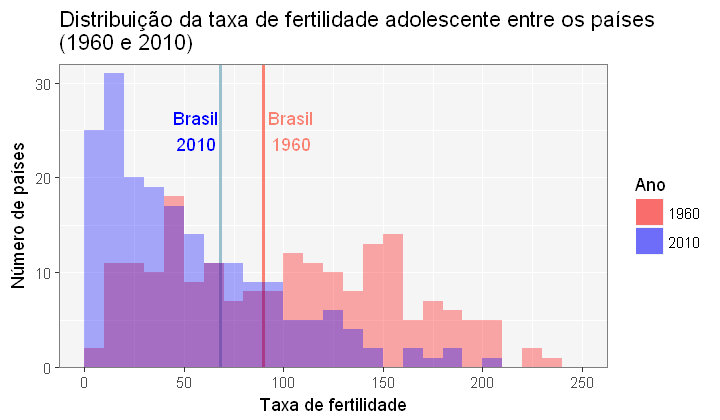

In [7]:
ggplot(histdata_twoyears) +
  geom_vline(aes(xintercept=68), color='lightblue3', size=0.9) +
  geom_vline(aes(xintercept=90), color='salmon', size=0.9) +
  annotate("text", x=c(56,104), y=25, size=3.7, label=c("Brasil\n2010","Brasil\n1960"), color=c("blue","salmon")) +
  geom_histogram(aes(`1960`, fill="Ano"), na.rm=TRUE, binwidth=10, boundary=0, alpha=0.33) +
  geom_histogram(aes(`2010`, fill="Ano2"), na.rm=TRUE, binwidth=10, boundary=0, alpha=0.33) +
  scale_fill_manual(name=c("Ano","Ano2"), values=c("red","blue"), labels=c("1960","2010")) +
  scale_x_continuous(name = "Taxa de fertilidade", limits = c(0,250)) +
  scale_y_continuous(name = "Número de países", limits = c(0,32), expand = c(0, 0)) +
  labs(title = "Distribuição da taxa de fertilidade adolescente entre os países\n(1960 e 2010)") +
  tema

O histograma acima mostra a distribuição da taxa de fertilidade adolescente nos 194 países que estão na base de dados do Banco Mundial.

Em 1960 a fertilidade adolescente entre os países era mais dispersa, i.e. existia maior variação absoluta. Em 2010, observamos uma diminuição geral no indicador, além de maior aglomeração em valores menores.

Novamente, observamos que apesar da diminuição das taxas de fertilidade adolescente no Brasil, esta foi uma diminuição tímida em um contexto global. Isto fica ainda mais claro quando investigamos a posição relativa do Brasil.

In [8]:
rank60 <- drop_na(histdata_twoyears) %>% arrange(`1960`) %>%    # sort by TFRT
        mutate("BRA"=if_else(`Country Code`=="BRA", "yes", "no"))
rank60$`Country Name` <- factor(rank60$`Country Name`, levels = rank60$`Country Name`) # to retain order when plotting

rank10 <- drop_na(histdata_twoyears) %>% arrange(`2010`) %>%
        mutate("BRA"=if_else(`Country Code`=="BRA", "yes", "no"))
rank10$`Country Name` <- factor(rank10$`Country Name`, levels = rank10$`Country Name`)

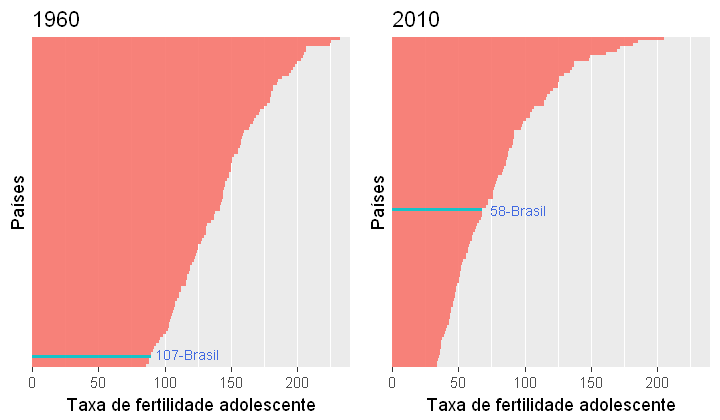

In [9]:
plt1 <- ggplot(rank60[-(1:84),], aes(x=`Country Name`, y=`1960`, fill=`BRA`)) + 
        geom_col(width=1, alpha=0.9, show.legend=FALSE) + coord_flip() +
        scale_x_discrete(name="Países", breaks=NULL, labels=NULL) +
        scale_y_continuous(name="Taxa de fertilidade adolescente", limits=c(0,240), expand=c(0,0)) +
        theme(panel.grid.major.y = element_blank()) +
        annotate("text", x=5, y=117, size=3, label="107-Brasil", color=c("royalblue")) +
        labs(title = "1960")

plt2 <- ggplot(rank10[-(1:84),], aes(x=`Country Name`, y=`2010`, fill=`BRA`)) + 
        geom_col(width=1, alpha=0.9, show.legend=FALSE) + coord_flip() +
        scale_x_discrete(name="Países", breaks=NULL, labels=NULL) +
        scale_y_continuous(name="Taxa de fertilidade adolescente", limits=c(0,240), expand=c(0,0)) +
        theme(panel.grid.major.y = element_blank()) +
        annotate("text", x=53, y=95, size=3, label="58-Brasil", color=c("royalblue")) +
        labs(title = "2010")

grid.arrange(plt1, plt2, ncol=2)

Os gráficos acima mostram os 110 países com maior incidência de gravidez na adolescência (com seus respectivos valores para a taxa de fertilidade).

Em 1960, havia 106 países com taxas de fertilidade na adolescência superiores à brasileira. Em 2010, apenas 57.

Nos últimos anos, a taxa de fertilidade total (número de filhos por mulher) no Brasil diminuiu consideravelmente. As taxas de fertilidade adolescente, no entanto, continuam bastante elevadas - característica de países subdesenvolvidos e de baixa renda que reflete as desigualdades presentes no Brasil. A gravidez na adolescência tem diversos potenciais nocivos, e tem prevalência na população mais pobre.
https://www.ecodebate.com.br/2018/03/02/taxa-de-gravidez-adolescente-no-brasil-esta-acima-da-media-latino-americana-e-caribenha/

### Referências Adicionais
Esta análise foi inspirada por um exercício proposto no curso "Data Analysis for Social Scientists" oferecido no segundo semestre de 2018 pelo MIT na plataforma EdX (MITx - 14.310x).